In [1]:
from  helpers import *
import spotipy
from spotipy import SpotifyClientCredentials, util
from IPython.core.display import clear_output

import pandas as pd 
import pandasql as ps 
import time
import sqlite3

import matplotlib.pyplot as plt
plt.style.use("seaborn")
from mpl_toolkits.mplot3d import Axes3D

In [2]:
tracks,columns = download_playlist('4nNKkezuAm9xBbTNzsnLj7',316)
#If the id if for artist, you must to put specify True to the artist parameter
#tracks,columns = download_albums('id_of_the_artist_or_the_album',artist=False)
df1 = pd.DataFrame(tracks,columns=columns)
df1.head()

Music Downloaded!


,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature
0,Sucker,Sucker,Jonas Brothers,4y3OI86AEP6PQoDE6olYhO,2019-03-01,9,181040,0.842,0.0427,0.734,0.000,0.106,0.952,-5.065,0.0588,137.958,1,4
1,Sunday Morning,Songs About Jane,Maroon 5,4T5cqerbDXueYSVfXkIITo,2002-06-25,0,244866,0.604,0.0756,0.761,0.000,0.062,0.787,-5.227,0.0468,88.040,0,4
2,Rain,Freedom Child,The Script,2QWP8NYYplOqEFBYGCcq0S,2017-09-01,62,209346,0.689,0.2410,0.586,0.000,0.356,0.611,-7.610,0.1070,93.020,6,4
3,November Rain,Use Your Illusion I,Guns N' Roses,53968oKecrFxkErocab2Al,1991-09-17,0,537506,0.197,0.0165,0.629,0.279,0.125,0.221,-9.291,0.0300,79.495,11,4
4,Best 4 U,Red Pill Blues (Deluxe),Maroon 5,3I1JTx525DKElzlTYOBfZN,2018-06-15,53,239751,0.526,0.1270,0.608,0.000,0.113,0.372,-5.776,0.1690,93.311,10,4


In [3]:
df1.to_pickle(r'C:\Users\hp\Documents\ProjectOne\Created_features\Songs_I_Like.pkl')


In [4]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
music_feature = df1[['popularity','danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','length']]
music_feature.loc[:]=min_max_scaler.fit_transform(music_feature.loc[:])

C:\Python\Python37\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


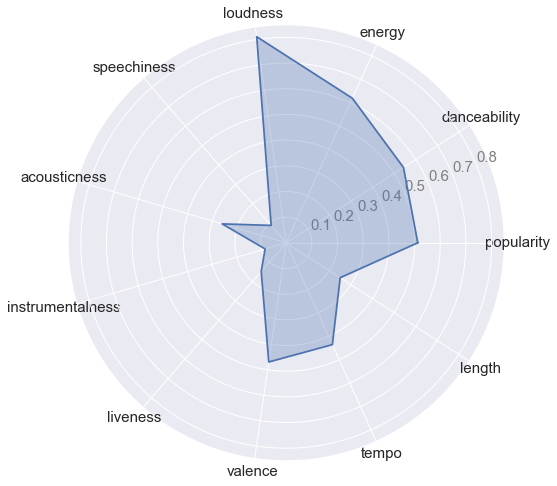

In [5]:
# plot size
pi=3.14
fig=plt.figure(figsize=(12,8))

# convert column names into a list
categories=list(music_feature.columns)
# number of categories
N=len(categories)

# create a list with the average of all features
value=list(music_feature.mean())

# repeat first value to close the circle
# the plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
value+=value[:1]
# calculate angle for each category
angles=[n/float(N)*2*pi for n in range(N)]
angles+=angles[:1]

# plot
plt.polar(angles, value)
plt.fill(angles,value,alpha=0.3)

# plt.title('Discovery Weekly Songs Audio Features', size=35)

plt.xticks(angles[:-1],categories, size=15)
plt.yticks(color='grey',size=15)
plt.show()